# Shakespeare's plays

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#NLP libraries
import spacy
from empath import Empath

nlp = spacy.load('en_core_web_sm')

## Read the data

In [2]:
# read the data
DATA = "../data/"
df = pd.read_csv(DATA + "Shakespeare_data.csv")
df = df.drop(columns=['Dataline'])

df = df.dropna()

In [3]:
df.head()

Play  PlayerLinenumber ActSceneLine         Player  \
3  Henry IV               1.0        1.1.1  KING HENRY IV   
4  Henry IV               1.0        1.1.2  KING HENRY IV   
5  Henry IV               1.0        1.1.3  KING HENRY IV   
6  Henry IV               1.0        1.1.4  KING HENRY IV   
7  Henry IV               1.0        1.1.5  KING HENRY IV   

                                       PlayerLine  
3          So shaken as we are, so wan with care,  
4      Find we a time for frighted peace to pant,  
5  And breathe short-winded accents of new broils  
6         To be commenced in strands afar remote.  
7       No more the thirsty entrance of this soil

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105152 entries, 3 to 111394
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Play              105152 non-null  object 
 1   PlayerLinenumber  105152 non-null  float64
 2   ActSceneLine      105152 non-null  object 
 3   Player            105152 non-null  object 
 4   PlayerLine        105152 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.8+ MB


## Clean the dataframe

In [5]:
# clean dataframe
df = df[df.Player.notnull()]

# get the individual act, scene and line numbers from the ActSceneLine column
df['Act'] = [act.split(".")[0] if pd.notnull(act) else act for act in df.ActSceneLine]
df['Scene'] = [act.split(".")[1] if pd.notnull(act) else act for act in df.ActSceneLine]
df['Line'] = [act.split(".")[2] if pd.notnull(act) else act for act in df.ActSceneLine]

df['Act'] = pd.to_numeric(df['Act'], errors='coerce')
df['Scene'] = pd.to_numeric(df['Scene'], errors='coerce')
df['Line'] = pd.to_numeric(df['Line'], errors='coerce')

df['Player'] = [player.capitalize() for player in df.Player]

# plays of interest
plays = ['Hamlet', 'Othello', 'Macbeth', 'King Lear', 'Romeo and Juliet', 
         'A Midsummer nights dream', 'Julius Caesar', 'Merchant of Venice']
plays = [play.capitalize() for play in plays]

# filter the selected plays in the dataframe
df['Play'] = [play.capitalize() for play in df.Play]
df = df[df['Play'].isin(plays)]

df

Play  PlayerLinenumber ActSceneLine     Player  \
32435            Hamlet               1.0        1.1.1   Bernardo   
32436            Hamlet               2.0        1.1.2  Francisco   
32437            Hamlet               3.0        1.1.3   Bernardo   
32438            Hamlet               4.0        1.1.4  Francisco   
32439            Hamlet               5.0        1.1.5   Bernardo   
...                 ...               ...          ...        ...   
88588  Romeo and juliet              65.0      5.3.317     Prince   
88589  Romeo and juliet              65.0      5.3.318     Prince   
88590  Romeo and juliet              65.0      5.3.319     Prince   
88591  Romeo and juliet              65.0      5.3.320     Prince   
88592  Romeo and juliet              65.0      5.3.321     Prince   

                                             PlayerLine  Act  Scene  Line  
32435                                      Who's there?    1      1     1  
32436       Nay, answer me: stand, and unfold yourself.    1      1     2  
32437                               Long live the king!    1      1     3  
32438                                         Bernardo?    1      1     4  
32439                                               He.    1      1     5  
...                                                 ...  ...    ...   ...  
88588      The sun, for sorrow, will not show his head:    5      3   317  
88589  Go hence, to have more talk of these sad things,    5      3   318  
88590        Some shall be pardon'd, and some punished:    5      3   319  
88591                 For never was a story of more woe    5      3   320  
88592                Than this of Juliet and her Romeo.    5      3   321  

[23993 rows x 8 columns]

In [6]:
# creates one dataframe for each play
Hamlet = df[(df["Play"] == "Hamlet")]
King_Lear = df[(df["Play"] == "King Lear")]
Julius_Caesar = df[(df["Play"] == "Julius Caesar")]
macbeth = df[(df["Play"] == "macbeth")]
Merchant_of_Venice = df[(df["Play"] == "Merchant of Venice")]
A_Midsummer_nights_dream = df[(df["Play"] == "A Midsummer nights dream")]
Othello = df[(df["Play"] == "Othello")]
Romeo_and_Juliet = df[(df["Play"] == "Romeo and Juliet")]

In [7]:
df.isnull().sum()

Play                0
PlayerLinenumber    0
ActSceneLine        0
Player              0
PlayerLine          0
Act                 0
Scene               0
Line                0
dtype: int64

## Analysis of the plays

### List all the players per play

In [8]:
# create a dictionnary containing for each Shakespeare's play, a list of all the players
players_per_play = {shakespeare_play: df[df.Play == shakespeare_play].Player.unique().tolist() for shakespeare_play in df.Play.unique()}
players_per_play

{'Hamlet': ['Bernardo',
  'Francisco',
  'Horatio',
  'Marcellus',
  'King claudius',
  'Voltimand',
  'Laertes',
  'Lord polonius',
  'Hamlet',
  'Queen gertrude',
  'All',
  'Ophelia',
  'Ghost',
  'Reynaldo',
  'Rosencrantz',
  'Guildenstern',
  'First player',
  'Prologue',
  'Player king',
  'Player queen',
  'Lucianus',
  'Prince fortinbras',
  'Captain',
  'Gentleman',
  'Danes',
  'Servant',
  'First sailor',
  'Messenger',
  'First clown',
  'Second clown',
  'First priest',
  'Osric',
  'Lord',
  'First ambassador'],
 'Julius caesar': ['Flavius',
  'First commoner',
  'Marullus',
  'Second commoner',
  'Caesar',
  'Casca',
  'Calpurnia',
  'Antony',
  'Soothsayer',
  'Brutus',
  'Cassius',
  'Cicero',
  'Cinna',
  'Lucius',
  'Decius brutus',
  'Metellus cimber',
  'Trebonius',
  'Portia',
  'Ligarius',
  'Servant',
  'Publius',
  'Artemidorus',
  'Popilius',
  'Citizens',
  'First citizen',
  'Second citizen',
  'Third citizen',
  'All',
  'Fourth citizen',
  'Several citize

### Number of players in each play

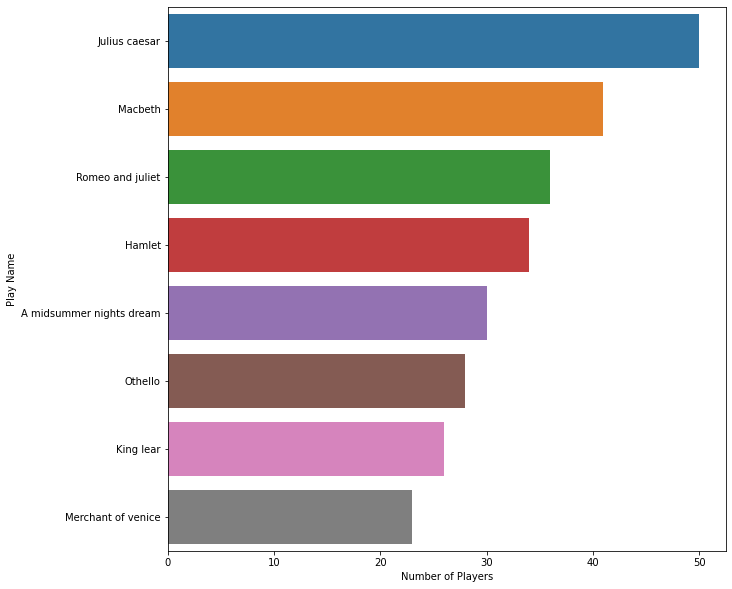

In [9]:
numberPlayers = df.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame().reset_index()
numberPlayers = numberPlayers.rename(columns={"Player": "Num Players"})
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

### Number of lines for each play

<AxesSubplot:>

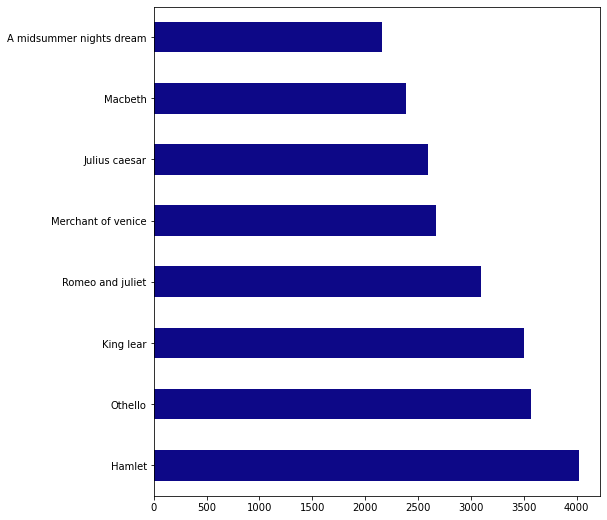

In [10]:
Play_Count = df['Play'].value_counts()
Play_Count.plot(kind='barh',label='Play Count',figsize=(8,9),colormap='plasma')

#### Number of lines for each player

<AxesSubplot:>

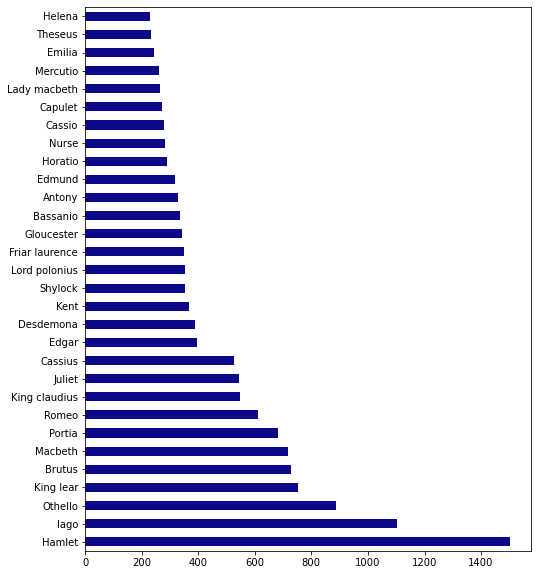

In [11]:
Player_Count = df['Player'].value_counts()[:30]
Player_Count.plot(kind='barh',label='Player Count Top 30',figsize=(8,10),colormap='plasma')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

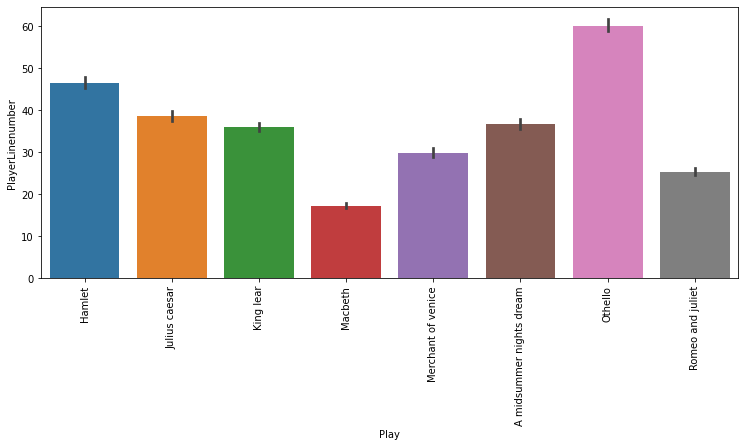

In [12]:
plt.rcParams['figure.figsize']=(12.5,5)
ax = sns.barplot(x='Play',y='PlayerLinenumber',data = df)
plt.setp(ax.get_xticklabels(), rotation=90)

### Get the name of the players mentioned in every line of the play

In [13]:
def line_analysis(line_series, players_per_play):
    ''' Analyze each line of the play: get the number of words and detect if other players are mentioned in the line.'''
    
    line = line_series.PlayerLine
    
    # tokenize the line into words and remove the punctuation
    words = [word.strip(string.punctuation) for word in line.split()]
    
    # get the number of words in a line
    nb_words = len(words)
    line_series['NbWords'] = nb_words
    
    # get the players' names for this play
    list_of_players = players_per_play[line_series.Play]
    
    # get the names of the players mentioned in the line
    mentioned_players = [word.capitalize() for word in words if word.capitalize() in list_of_players]
    # get the number of players mentioned in the line
    nb_mentioned_players = len(mentioned_players)
    
    line_series['NbMentionedPlayers'] = nb_mentioned_players
    line_series['MentionedPlayer'] = mentioned_players
    
    return (line_series)

In [14]:
# keep only lines where a player talks (remove scene description lines)
mentions = df.apply(lambda x: line_analysis(x, players_per_play), axis=1)

# add new columns to main dataframe
df['NbWords'] = mentions['NbWords']
df['NbMentionedPlayers'] = mentions['NbMentionedPlayers']
df['MentionedPlayer'] = mentions['MentionedPlayer']
df.loc[df['ActSceneLine'].isnull(), 'NbMentionedPlayers'] = None
df.loc[df['ActSceneLine'].isnull(), 'MentionedPlayer'] = None

mentions = mentions.explode('MentionedPlayer')
mentions = mentions[mentions['ActSceneLine'].notnull() 
                    & mentions['MentionedPlayer'].notnull()][['Play', 'ActSceneLine', 'Player', 'MentionedPlayer']]
mentions

Play ActSceneLine     Player MentionedPlayer
32438            Hamlet        1.1.4  Francisco        Bernardo
32441            Hamlet        1.1.7   Bernardo       Francisco
32447            Hamlet       1.1.13   Bernardo         Horatio
32447            Hamlet       1.1.13   Bernardo       Marcellus
32456            Hamlet       1.1.21  Francisco        Bernardo
...                 ...          ...        ...             ...
88572  Romeo and juliet      5.3.301     Prince        Montague
88577  Romeo and juliet      5.3.306    Capulet        Montague
88584  Romeo and juliet      5.3.313   Montague          Juliet
88592  Romeo and juliet      5.3.321     Prince          Juliet
88592  Romeo and juliet      5.3.321     Prince           Romeo

[3437 rows x 4 columns]

In [15]:
df.head(5)

Play  PlayerLinenumber ActSceneLine     Player  \
32435  Hamlet               1.0        1.1.1   Bernardo   
32436  Hamlet               2.0        1.1.2  Francisco   
32437  Hamlet               3.0        1.1.3   Bernardo   
32438  Hamlet               4.0        1.1.4  Francisco   
32439  Hamlet               5.0        1.1.5   Bernardo   

                                        PlayerLine  Act  Scene  Line  NbWords  \
32435                                 Who's there?    1      1     1        2   
32436  Nay, answer me: stand, and unfold yourself.    1      1     2        7   
32437                          Long live the king!    1      1     3        4   
32438                                    Bernardo?    1      1     4        1   
32439                                          He.    1      1     5        1   

       NbMentionedPlayers MentionedPlayer  
32435                 0.0              []  
32436                 0.0              []  
32437                 0.0              []  
32438                 1.0      [Bernardo]  
32439                 0.0              []

### Find the first and last players speaking in a scene

In [16]:
def find_players(x):
    ''' Finds the first and last players speaking in a scene '''
    
    first_player = x[x.Line == 1]['Player'].values[0]
    last_player = x[x.Line == x.Line.max()]['Player'].values[0]
    
    return pd.Series(data = {'first_player': first_player, 'last_player': last_player})

In [17]:
# first and last player speaking in a scene
df.groupby(['Play', 'Act', 'Scene']).apply(find_players)

first_player      last_player
Play                     Act Scene                               
A midsummer nights dream 1   1           Theseus           Helena
                             2            Quince           Bottom
                         2   1              Puck             Puck
                             2           Titania           Hermia
                         3   1            Bottom          Titania
...                                          ...              ...
Romeo and juliet         4   4      Lady capulet          Capulet
                             5             Nurse  Second musician
                         5   1             Romeo            Romeo
                             2        Friar john   Friar laurence
                             3             Paris           Prince

[161 rows x 2 columns]

### Find the most talkative player in each scene

In [18]:
# get the number of words of each player in each scene
talkative_df = df.groupby(['Play', 'Act', 'Scene', 'Player'])['NbWords'].sum().reset_index() 
# get player that said the most words in each scene 
talkative_df = talkative_df.groupby(['Play', 'Act', 'Scene'])[['Player', 'NbWords']].max().reset_index()
talkative_df

Play  Act  Scene          Player  NbWords
0    A midsummer nights dream    1      1         Theseus      468
1    A midsummer nights dream    1      2      Starveling      368
2    A midsummer nights dream    2      1         Titania      605
3    A midsummer nights dream    2      2         Titania      360
4    A midsummer nights dream    3      1         Titania      697
..                        ...  ...    ...             ...      ...
156          Romeo and juliet    4      4  Second servant      145
157          Romeo and juliet    4      5  Third musician      217
158          Romeo and juliet    5      1           Romeo      557
159          Romeo and juliet    5      2  Friar laurence      126
160          Romeo and juliet    5      3  Third watchman      658

[161 rows x 5 columns]

## Topic detection

In [19]:
def empath_analysis(s, categories, nlp):
    ''' gets a series type object containing a line of a play and does a topic detection for that line'''
    
    # analyze line
    doc = nlp(s['PlayerLine'])
    # empath analysis on line
    empath_features = lexicon.analyze(doc.text,categories = categories)
    
    return pd.Series(empath_features)

In [20]:
lexicon = Empath()

#categories = ["love", "betrayal", "loyalty", "revenge", "family", "power", "guilt", "fate", "fortune", 
#              "poverty", "forgiveness", "reconciliation", "jealousy", "war", "corruption", "good", "evil"]
categories = ["love", "family", "power", "war"]

semantic_df = df.copy()
semantic_df = semantic_df[semantic_df['ActSceneLine'].notnull()] # make sure it is not a description line
semantic_df[categories] = semantic_df.apply(lambda x: empath_analysis(x, categories, nlp), axis=1) # topic detection

semantic_df

Play  PlayerLinenumber ActSceneLine     Player  \
32435            Hamlet               1.0        1.1.1   Bernardo   
32436            Hamlet               2.0        1.1.2  Francisco   
32437            Hamlet               3.0        1.1.3   Bernardo   
32438            Hamlet               4.0        1.1.4  Francisco   
32439            Hamlet               5.0        1.1.5   Bernardo   
...                 ...               ...          ...        ...   
88588  Romeo and juliet              65.0      5.3.317     Prince   
88589  Romeo and juliet              65.0      5.3.318     Prince   
88590  Romeo and juliet              65.0      5.3.319     Prince   
88591  Romeo and juliet              65.0      5.3.320     Prince   
88592  Romeo and juliet              65.0      5.3.321     Prince   

                                             PlayerLine  Act  Scene  Line  \
32435                                      Who's there?    1      1     1   
32436       Nay, answer me: stand, and unfold yourself.    1      1     2   
32437                               Long live the king!    1      1     3   
32438                                         Bernardo?    1      1     4   
32439                                               He.    1      1     5   
...                                                 ...  ...    ...   ...   
88588      The sun, for sorrow, will not show his head:    5      3   317   
88589  Go hence, to have more talk of these sad things,    5      3   318   
88590        Some shall be pardon'd, and some punished:    5      3   319   
88591                 For never was a story of more woe    5      3   320   
88592                Than this of Juliet and her Romeo.    5      3   321   

       NbWords  NbMentionedPlayers  MentionedPlayer  love  family  power  war  
32435        2                 0.0               []   0.0     0.0    0.0  0.0  
32436        7                 0.0               []   0.0     0.0    0.0  0.0  
32437        4                 0.0               []   0.0     0.0    0.0  0.0  
32438        1                 1.0       [Bernardo]   0.0     0.0    0.0  0.0  
32439        1                 0.0               []   0.0     0.0    0.0  0.0  
...        ...                 ...              ...   ...     ...    ...  ...  
88588        9                 0.0               []   0.0     0.0    0.0  0.0  
88589       10                 0.0               []   0.0     0.0    0.0  0.0  
88590        7                 0.0               []   0.0     0.0    0.0  0.0  
88591        8                 0.0               []   0.0     0.0    0.0  0.0  
88592        7                 2.0  [Juliet, Romeo]   0.0     0.0    0.0  0.0  

[23993 rows x 15 columns]

### Detect how the topics evolve between acts for each play

In [21]:
# topic detection for each play - for each act
play_topics = semantic_df.copy()
# get the number of topic that occured for each act
play_topics = play_topics.groupby(['Play', 'Act'])[['NbWords'] + categories].sum().reset_index()
# normalize the number of topics by the number of words per act
play_topics.loc[:, categories] = play_topics[categories].div(play_topics['NbWords'], axis=0)
play_topics

Play  Act  NbWords      love    family     power  \
0   A midsummer nights dream    1     2682  0.005966  0.004847  0.003356   
1   A midsummer nights dream    2     3255  0.004608  0.003687  0.002765   
2   A midsummer nights dream    3     5096  0.007849  0.001766  0.000981   
3   A midsummer nights dream    4     2045  0.004401  0.003423  0.000978   
4   A midsummer nights dream    5     3012  0.004648  0.001992  0.000332   
5                     Hamlet    1     6571  0.002435  0.004566  0.002587   
6                     Hamlet    2     5597  0.003037  0.004645  0.002501   
7                     Hamlet    3     6984  0.005584  0.005011  0.002721   
8                     Hamlet    4     5027  0.002785  0.004575  0.003183   
9                     Hamlet    5     5430  0.001473  0.000921  0.002210   
10             Julius caesar    1     4449  0.002023  0.002248  0.001124   
11             Julius caesar    2     4142  0.002656  0.002656  0.000483   
12             Julius caesar    3     4642  0.004955  0.003447  0.002154   
13             Julius caesar    4     3114  0.001927  0.002569  0.001606   
14             Julius caesar    5     2772  0.001443  0.002525  0.002165   
15                 King lear    1     6984  0.005727  0.007875  0.002721   
16                 King lear    2     4894  0.001430  0.006334  0.004495   
17                 King lear    3     4688  0.001493  0.002986  0.004053   
18                 King lear    4     5430  0.002026  0.002210  0.003683   
19                 King lear    5     3286  0.002739  0.004260  0.003956   
20                   Macbeth    1     3690  0.002168  0.001355  0.003252   
21                   Macbeth    2     2628  0.001903  0.002283  0.002664   
22                   Macbeth    3     3615  0.001383  0.003043  0.002490   
23                   Macbeth    4     3704  0.001620  0.003780  0.002700   
24                   Macbeth    5     2852  0.001753  0.001052  0.003506   
25        Merchant of venice    1     4041  0.003959  0.004207  0.001237   
26        Merchant of venice    2     5238  0.002673  0.004964  0.002482   
27        Merchant of venice    3     5273  0.002845  0.003603  0.001896   
28        Merchant of venice    4     3851  0.002337  0.003116  0.004934   
29        Merchant of venice    5     2520  0.002778  0.003968  0.002778   
30                   Othello    1     5505  0.004723  0.005086  0.002725   
31                   Othello    2     5538  0.005778  0.001264  0.001445   
32                   Othello    3     5896  0.005427  0.003053  0.000509   
33                   Othello    4     4954  0.003230  0.003230  0.000807   
34                   Othello    5     3942  0.003044  0.002029  0.001776   
35          Romeo and juliet    1     5637  0.005854  0.004967  0.001064   
36          Romeo and juliet    2     5358  0.008772  0.003173  0.000933   
37          Romeo and juliet    3     6366  0.003299  0.003142  0.000943   
38          Romeo and juliet    4     3167  0.002210  0.007894  0.000632   
39          Romeo and juliet    5     3379  0.002368  0.005031  0.003847   

         war  
0   0.000000  
1   0.002151  
2   0.000981  
3   0.000978  
4   0.000664  
5   0.001370  
6   0.000893  
7   0.001289  
8   0.000995  
9   0.001289  
10  0.000899  
11  0.001690  
12  0.001293  
13  0.001285  
14  0.006494  
15  0.000573  
16  0.000409  
17  0.001067  
18  0.001289  
19  0.002739  
20  0.001084  
21  0.001142  
22  0.002213  
23  0.001620  
24  0.002454  
25  0.000495  
26  0.000191  
27  0.000569  
28  0.000779  
29  0.000397  
30  0.002180  
31  0.003070  
32  0.001357  
33  0.000404  
34  0.003298  
35  0.001064  
36  0.001493  
37  0.001100  
38  0.000316  
39  0.001184

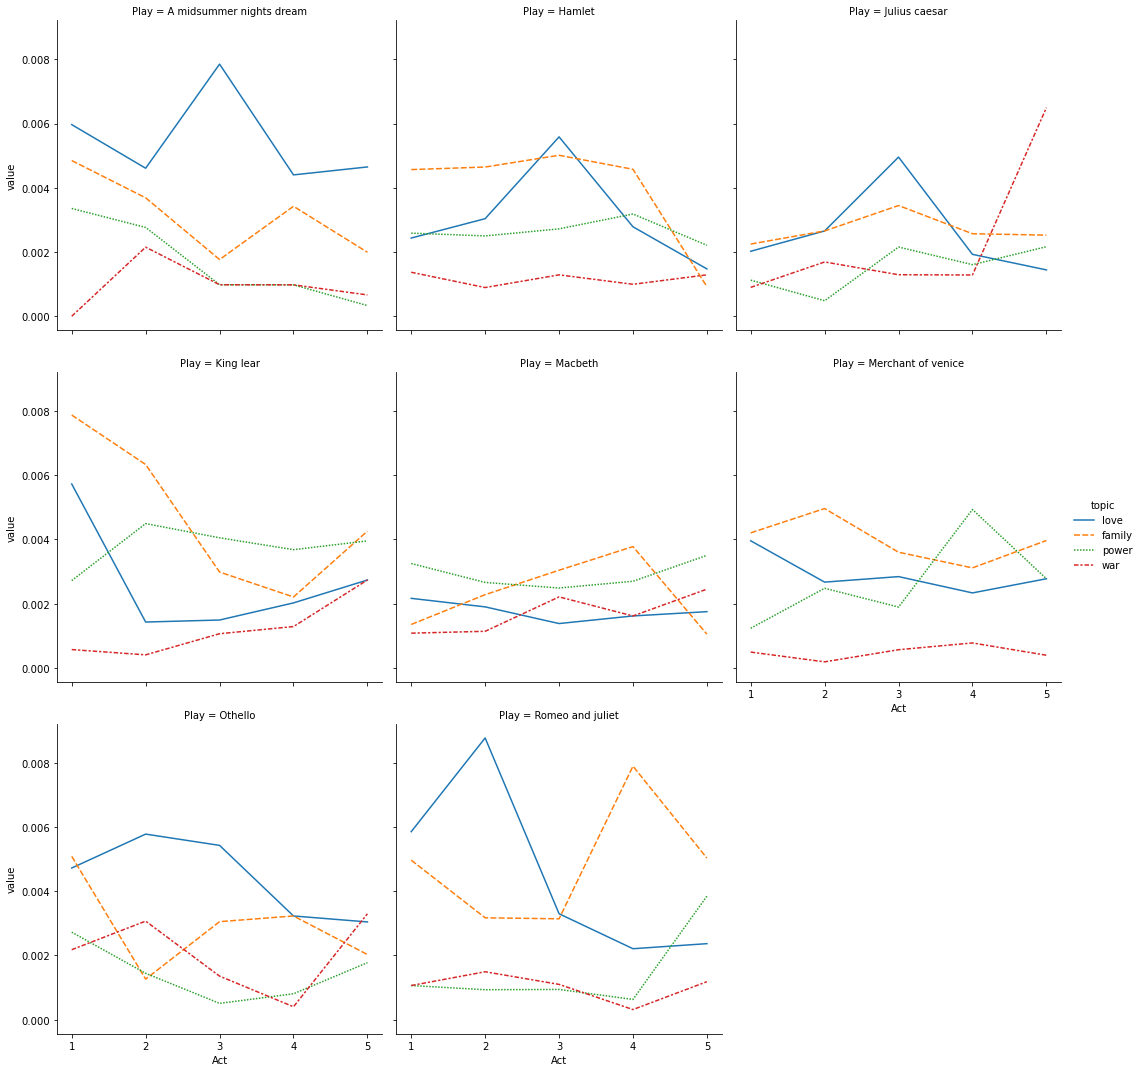

In [22]:
plot_df = pd.melt(play_topics, id_vars=['Play', 'Act'], 
                  value_vars=categories, var_name='topic', value_name='value')
plot_df['Act'] = plot_df['Act'].apply(lambda x: str(int(x)))

sns.relplot(
    data=plot_df, x="Act", y="value", col="Play",
    hue="topic", style="topic", kind="line", col_wrap=3
)

### Detect how the topics evolve between different plays

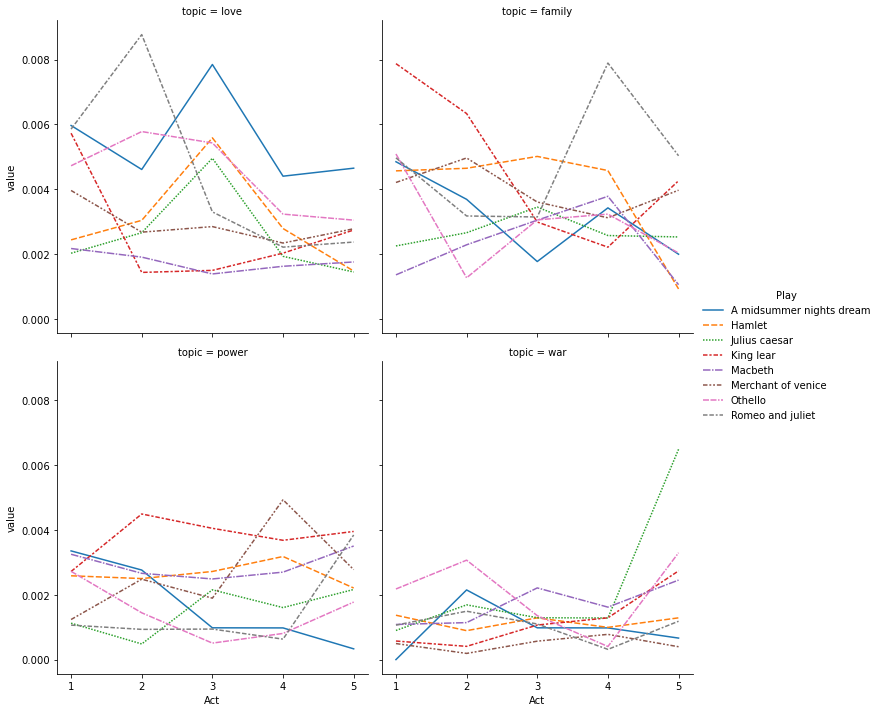

In [23]:
sns.relplot(
    data=plot_df, x="Act", y="value", col="topic",
    hue="Play", style="Play", kind="line", col_wrap=2
)

### Detect how the topics evolve for each player of each play

In [24]:
# topic detection for each play - for each player

play_topics = semantic_df.copy()
# get the number of topic that occured for each act
play_topics = play_topics.groupby(['Play', 'Player'])[['NbWords'] + categories].sum().reset_index()
# normalize the number of topics by the number of words per act
play_topics.loc[:, categories] = play_topics[categories].div(play_topics['NbWords'], axis=0)
play_topics

Play           Player  NbWords      love    family  \
0    A midsummer nights dream              All       11  0.000000  0.000000   
1    A midsummer nights dream           Bottom     1649  0.004245  0.002426   
2    A midsummer nights dream           Cobweb        5  0.000000  0.000000   
3    A midsummer nights dream        Demetrius     1063  0.013170  0.004704   
4    A midsummer nights dream            Egeus      295  0.006780  0.016949   
..                        ...              ...      ...       ...       ...   
263          Romeo and juliet  Second watchman        9  0.000000  0.000000   
264          Romeo and juliet          Servant      183  0.000000  0.000000   
265          Romeo and juliet   Third musician        7  0.000000  0.000000   
266          Romeo and juliet   Third watchman       26  0.000000  0.000000   
267          Romeo and juliet           Tybalt      262  0.000000  0.000000   

        power       war  
0    0.000000  0.000000  
1    0.000000  0.001213  
2    0.000000  0.000000  
3    0.000941  0.000000  
4    0.006780  0.000000  
..        ...       ...  
263  0.000000  0.000000  
264  0.005464  0.000000  
265  0.000000  0.000000  
266  0.000000  0.000000  
267  0.000000  0.000000  

[268 rows x 7 columns]

In [25]:
# topic detection for each play - for each act - for each player

play_topics = semantic_df.copy()
# get the number of topic that occured for each act
play_topics = play_topics.groupby(['Play', 'Act', 'Player'])[['NbWords'] + categories].sum().reset_index()
# normalize the number of topics by the number of words per act
play_topics.loc[:, categories] = play_topics[categories].div(play_topics['NbWords'], axis=0)
play_topics

Play  Act           Player  NbWords      love  \
0    A midsummer nights dream    1              All        7  0.000000   
1    A midsummer nights dream    1           Bottom      368  0.005435   
2    A midsummer nights dream    1        Demetrius       13  0.000000   
3    A midsummer nights dream    1            Egeus      216  0.009259   
4    A midsummer nights dream    1            Flute       22  0.000000   
..                        ...  ...              ...      ...       ...   
550          Romeo and juliet    5            Paris      249  0.004016   
551          Romeo and juliet    5           Prince      295  0.000000   
552          Romeo and juliet    5            Romeo     1215  0.004115   
553          Romeo and juliet    5  Second watchman        9  0.000000   
554          Romeo and juliet    5   Third watchman       26  0.000000   

       family     power       war  
0    0.000000  0.000000  0.000000  
1    0.005435  0.000000  0.000000  
2    0.000000  0.000000  0.000000  
3    0.013889  0.009259  0.000000  
4    0.000000  0.000000  0.000000  
..        ...       ...       ...  
550  0.000000  0.000000  0.000000  
551  0.006780  0.003390  0.006780  
552  0.003292  0.002469  0.000823  
553  0.000000  0.000000  0.000000  
554  0.000000  0.000000  0.000000  

[555 rows x 8 columns]

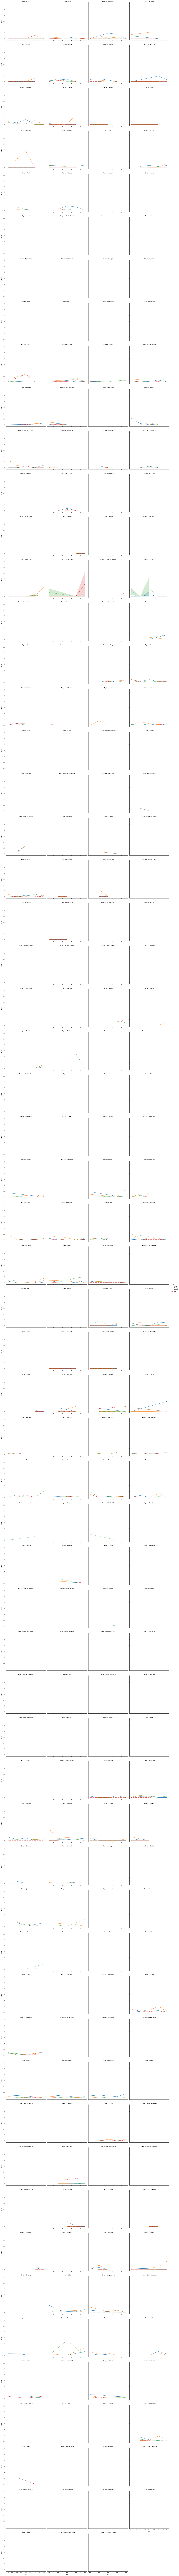

In [26]:
plot_df = pd.melt(play_topics.reset_index(), id_vars=['Play', 'Act', 'Player'], 
                  value_vars=categories, var_name='topic', value_name='value')

sns.relplot(
    data=plot_df, x="Act", y="value", col="Player",
    hue="topic", style="topic", kind="line", col_wrap=4
)

### Wordclouds

In [27]:
all_word = pd.Series(df['PlayerLine'].tolist()).astype(str)
word = pd.Series(df['PlayerLine'].tolist()).astype(str)

Hamlet_word = pd.Series(Hamlet['PlayerLine'].tolist()).astype(str)
King_Lear_word = pd.Series(King_Lear['PlayerLine'].tolist()).astype(str)
Julius_Caesar_word = pd.Series(Julius_Caesar['PlayerLine'].tolist()).astype(str)
macbeth_word = pd.Series(macbeth['PlayerLine'].tolist()).astype(str)
Merchant_of_Venice_word = pd.Series(Merchant_of_Venice['PlayerLine'].tolist()).astype(str)
A_Midsummer_nights_dream_word = pd.Series(A_Midsummer_nights_dream['PlayerLine'].tolist()).astype(str)
Othello_word = pd.Series(Othello['PlayerLine'].tolist()).astype(str)
Romeo_and_Juliet_word = pd.Series(Romeo_and_Juliet['PlayerLine'].tolist()).astype(str)

/var/folders/87/0btm09b14x74vw74zyj3qt0m0000gn/T/ipykernel_4770/3625034280.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  King_Lear_word = pd.Series(King_Lear['PlayerLine'].tolist()).astype(str)
/var/folders/87/0btm09b14x74vw74zyj3qt0m0000gn/T/ipykernel_4770/3625034280.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Julius_Caesar_word = pd.Series(Julius_Caesar['PlayerLine'].tolist()).astype(str)
/var/folders/87/0btm09b14x74vw74zyj3qt0m0000gn/T/ipykernel_4770/3625034280.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  macbeth_word = pd.Series(macbeth['PlayerLine'].tolist()).astype(str)
/var/folders/87/0btm09b14x74vw

Creating a WordCloud to see which words appear the most in each play

Hamlet


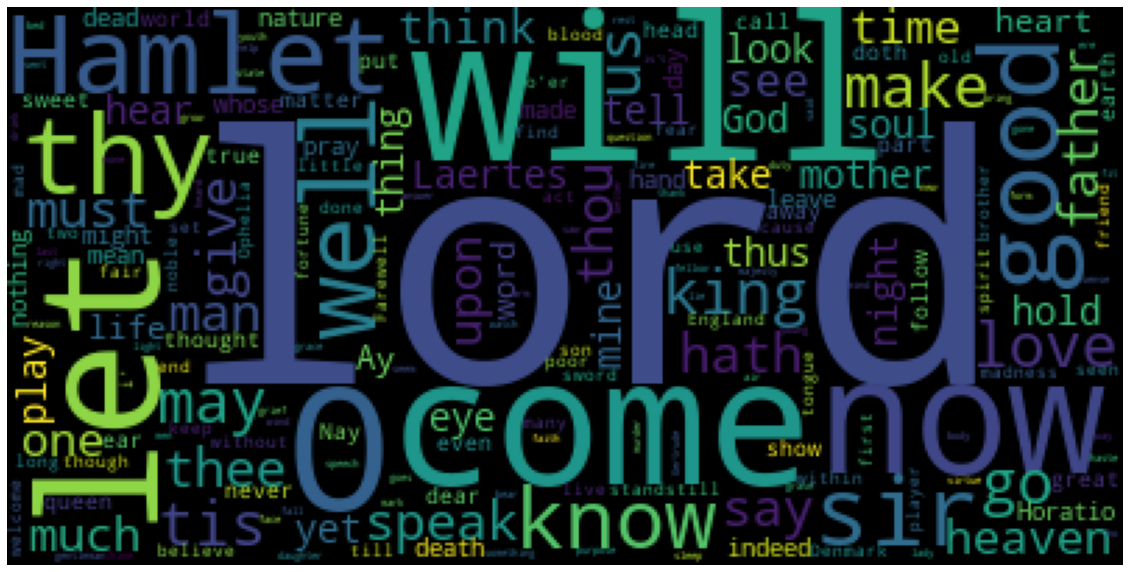

Julius caesar


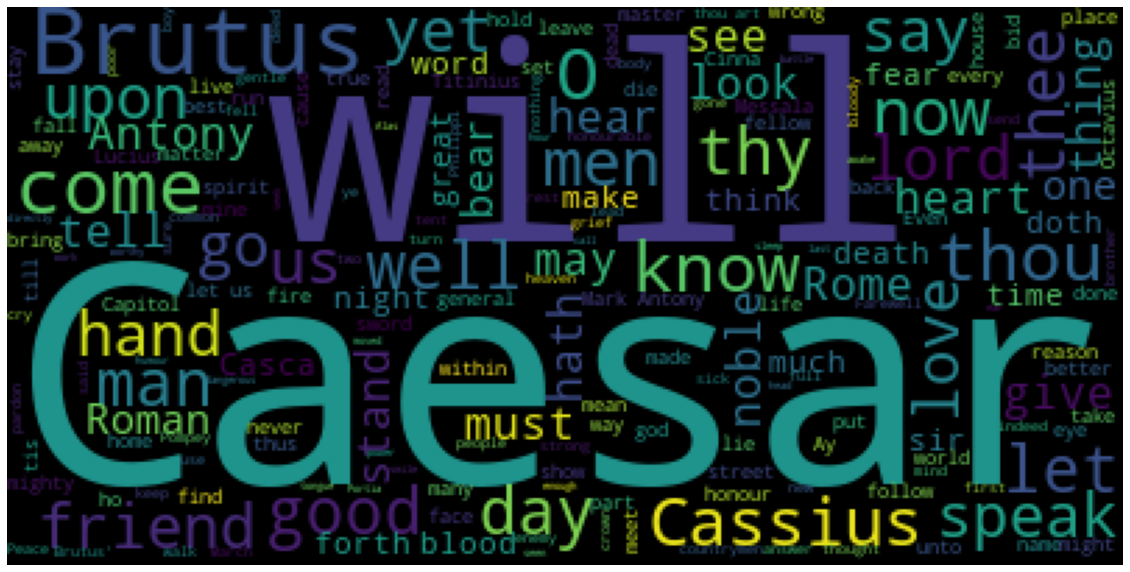

King lear


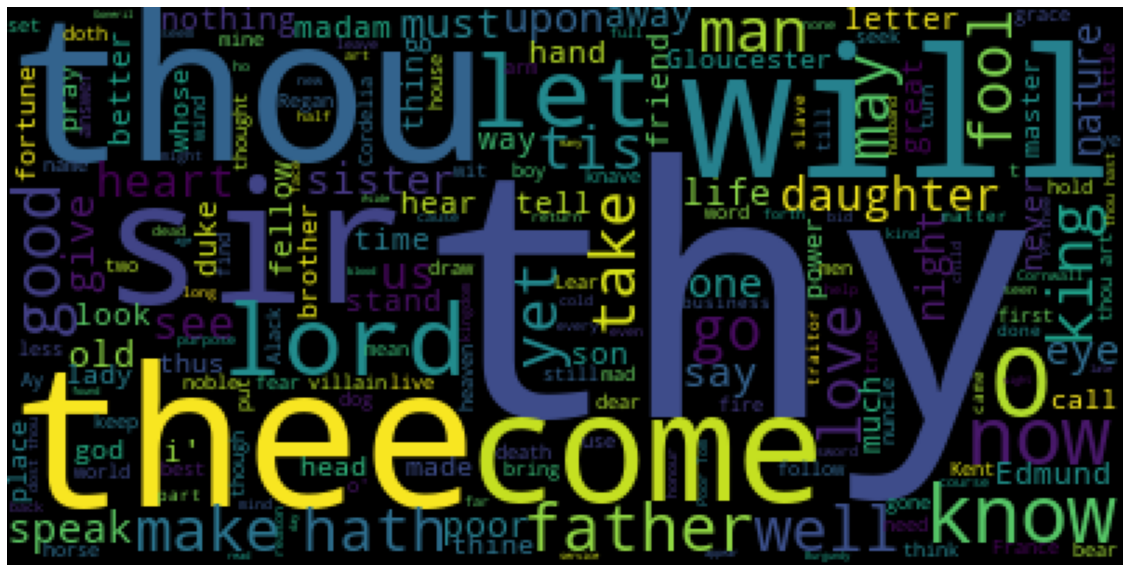

Macbeth


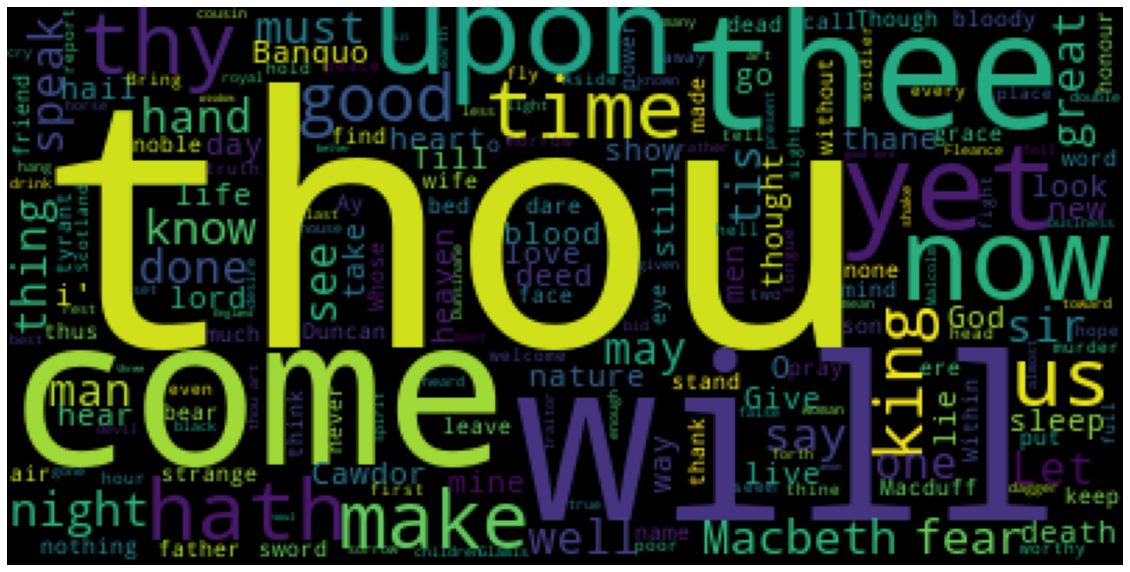

Merchant of venice


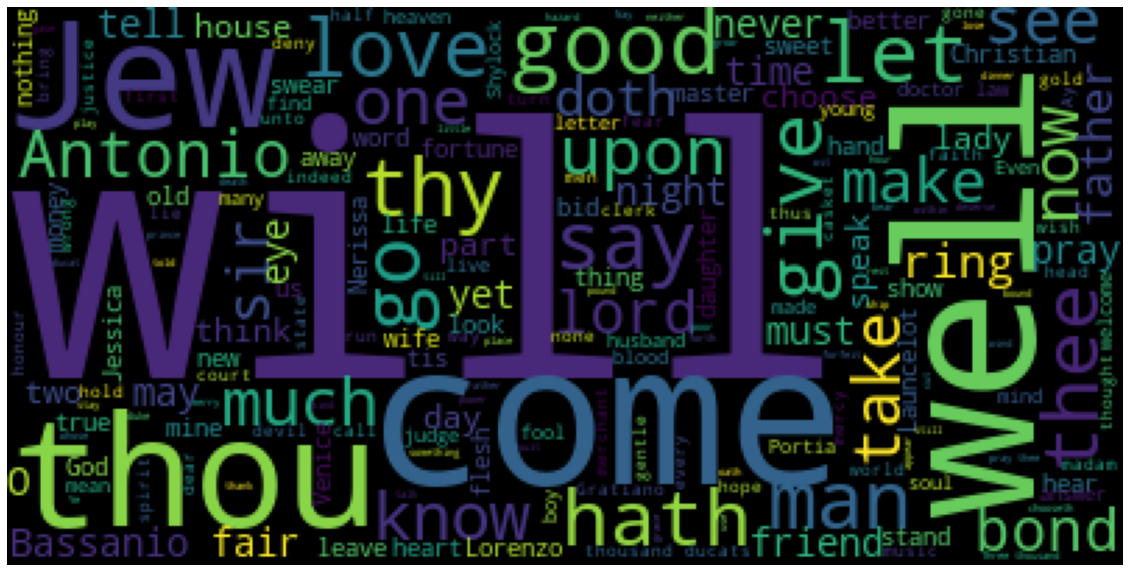

A midsummer nights dream


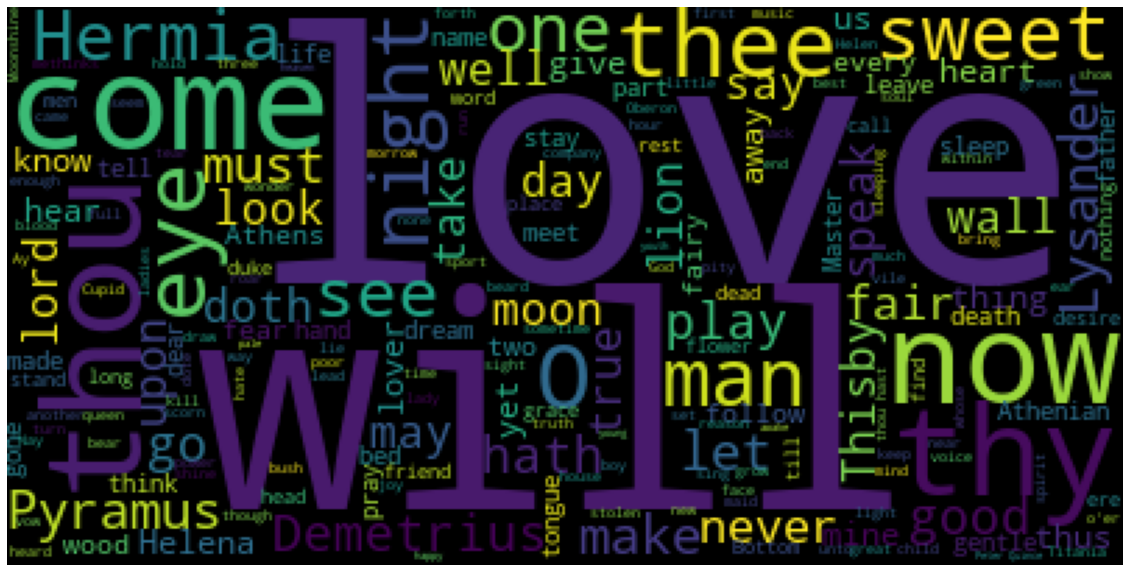

Othello


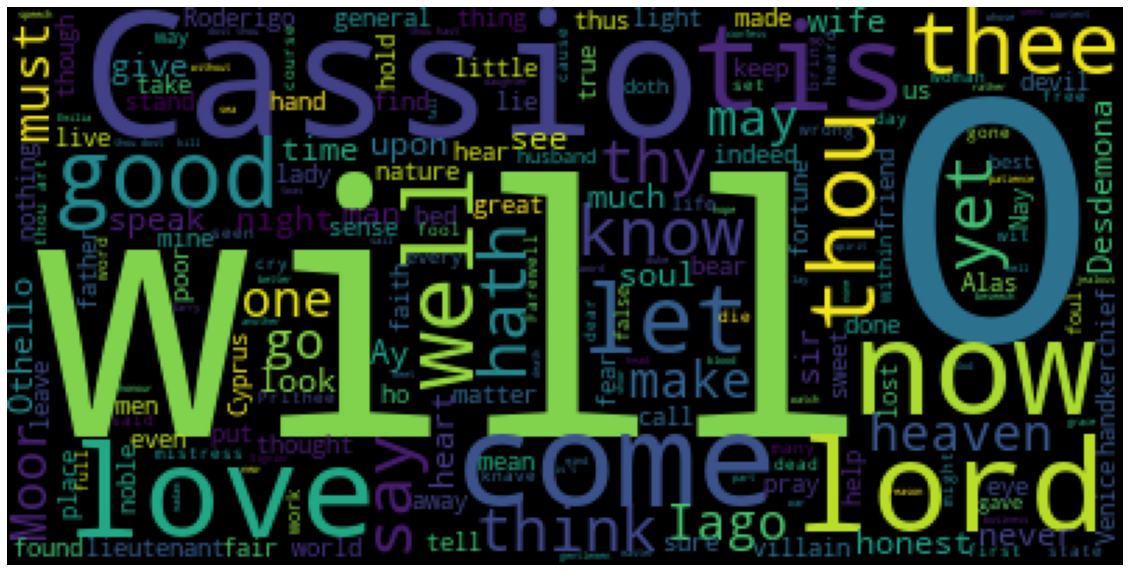

Romeo and juliet


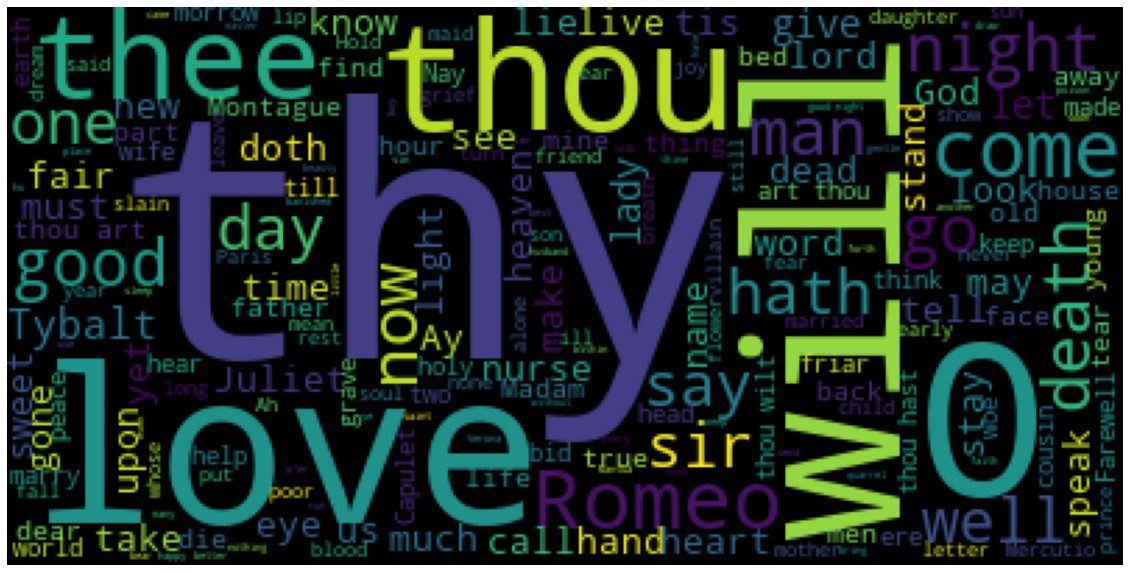

In [28]:
from wordcloud import WordCloud

play_name = df['Play'].unique().tolist()
for play in play_name:
    word = pd.Series(df[df["Play"] == play]["PlayerLine"].tolist()).astype(str)
    cloud = WordCloud(margin=0, max_font_size=125).generate(' '.join(word.astype(str)))
    print(play)
    plt.figure(figsize=(20,15)) 
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

## Sentiment Analysis